> **Importing Libraries**

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('../Datasets/Mental Health Dataset.csv')
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

> **Data Cleaning & Preprocessing**

In [4]:
data.drop_duplicates(inplace=True)
data.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5193
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

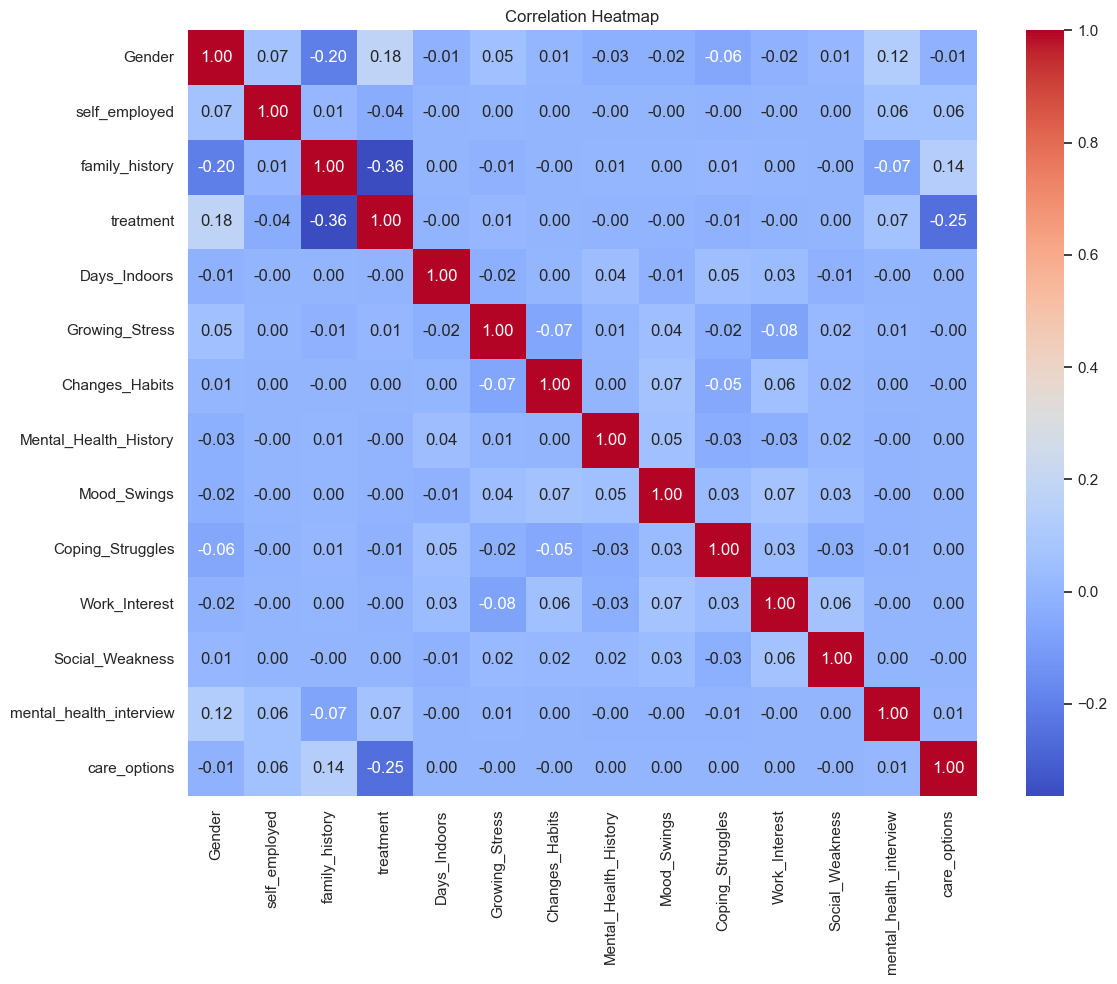

NameError: name 'corr' is not defined

<Figure size 1000x800 with 0 Axes>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (you can replace this with your file path)
df = data

# Drop non-informative or irrelevant columns for correlation (like Timestamp, Country, etc.)
df_cleaned = df.drop(columns=["Timestamp", "Country", "Occupation"])

# Fill missing values with a placeholder (optional)
df_cleaned = df_cleaned.fillna("Unknown")

# Convert categorical columns to numeric using label encoding
df_encoded = df_cleaned.apply(lambda col: pd.factorize(col)[0])

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [5]:
mode_value = data['self_employed'].mode()[0]  # Find the most frequent value
data['self_employed'].fillna(mode_value, inplace=True)  # Impute with mode
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290051 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                290051 non-null  object
 1   Gender                   290051 non-null  object
 2   Country                  290051 non-null  object
 3   Occupation               290051 non-null  object
 4   self_employed            290051 non-null  object
 5   family_history           290051 non-null  object
 6   treatment                290051 non-null  object
 7   Days_Indoors             290051 non-null  object
 8   Growing_Stress           290051 non-null  object
 9   Changes_Habits           290051 non-null  object
 10  Mental_Health_History    290051 non-null  object
 11  Mood_Swings              290051 non-null  object
 12  Coping_Struggles         290051 non-null  object
 13  Work_Interest            290051 non-null  object
 14  Social_Weakness          

In [6]:
data.drop("Timestamp", axis=1, inplace=True)
data.to_csv('../Results/Cleaned Dataset.csv')

> **Exploratory Data Analysis**

In [7]:
# Display unique values count for each column
categorical_summary = {col: data[col].value_counts() for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'int64'}
categorical_summary

{'Gender': Gender
 Male      237900
 Female     52151
 Name: count, dtype: int64,
 'Country': Country
 United States             169112
 United Kingdom             51356
 Canada                     18699
 Australia                   6014
 Netherlands                 5891
 Ireland                     5542
 Germany                     4680
 Sweden                      2812
 India                       2771
 France                      2340
 Brazil                      2340
 New Zealand                 1991
 South Africa                1991
 Switzerland                 1560
 Israel                      1560
 Italy                       1560
 Belgium                      821
 Poland                       821
 Russia                       780
 Denmark                      780
 Singapore                    780
 Greece                       780
 Czech Republic               390
 Georgia                      390
 Colombia                     390
 Moldova                      390
 Mexico       

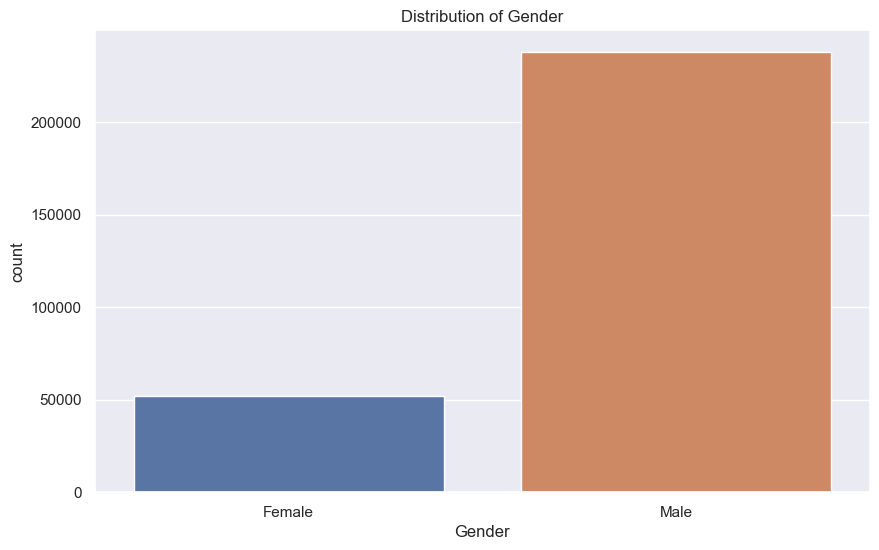

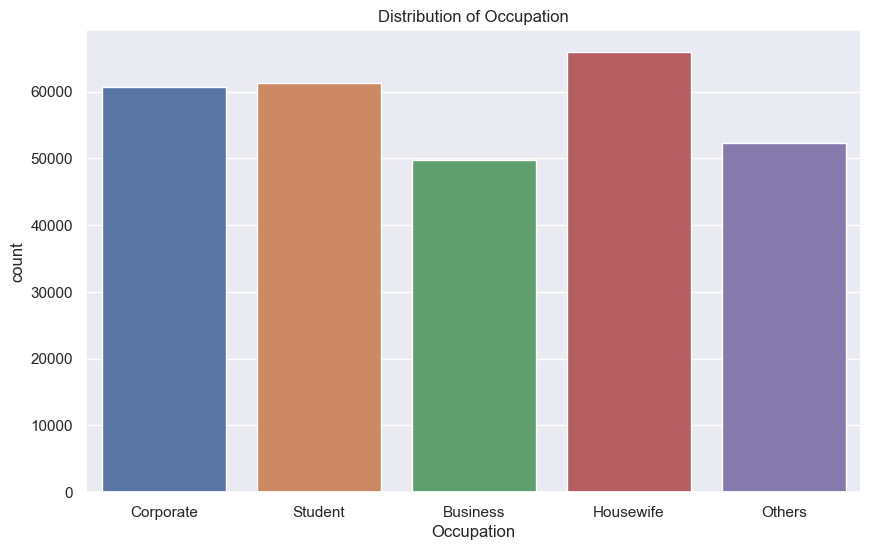

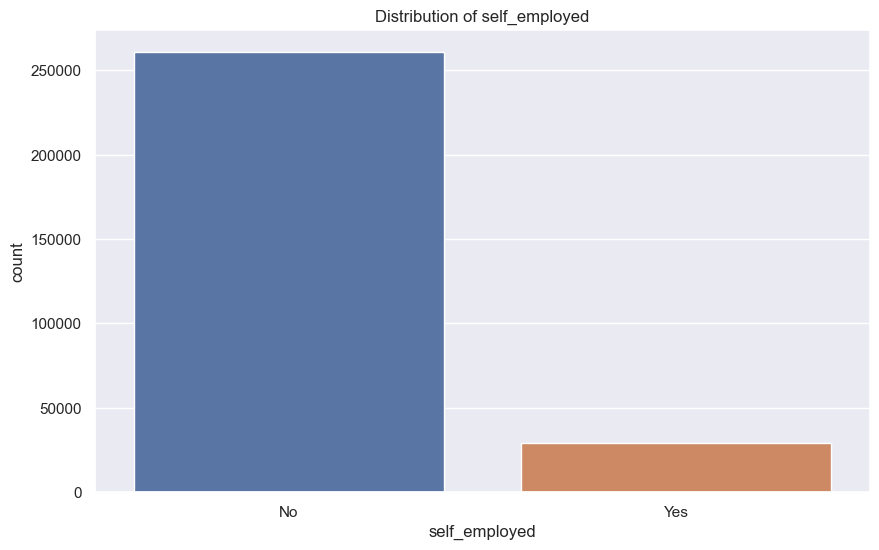

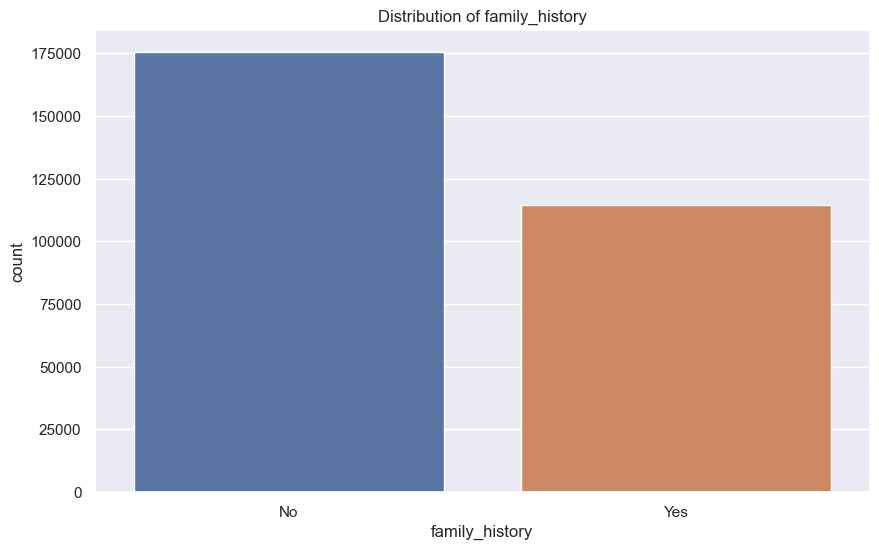

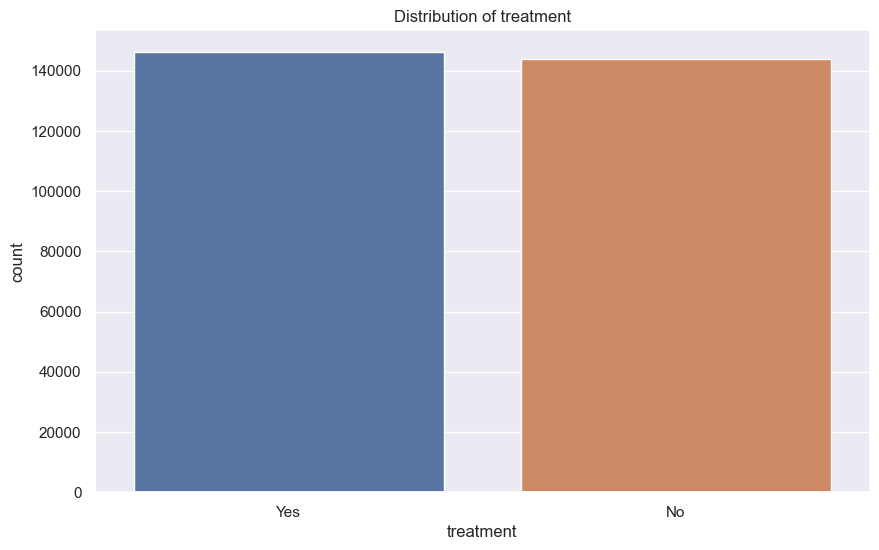

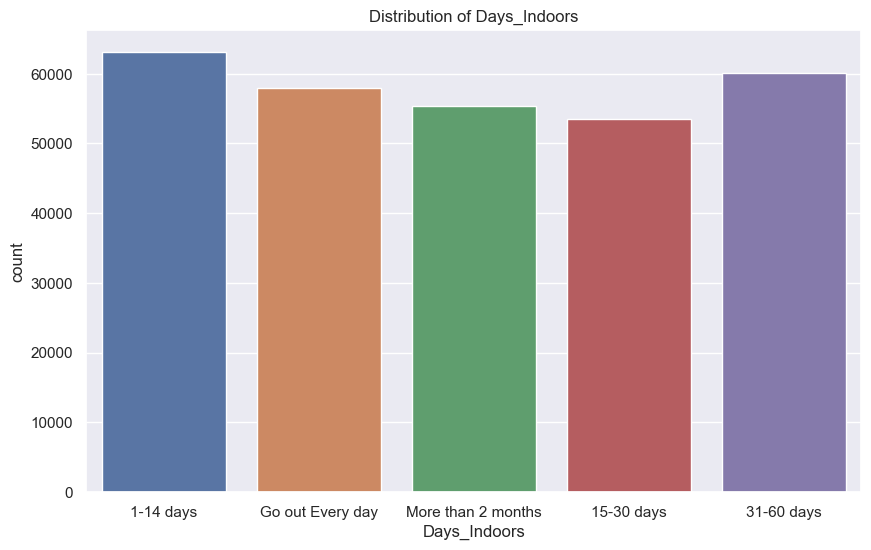

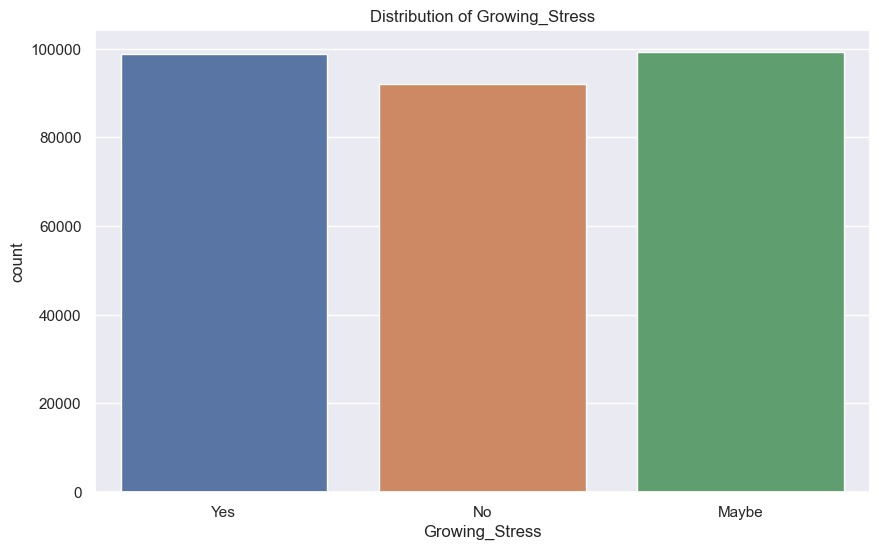

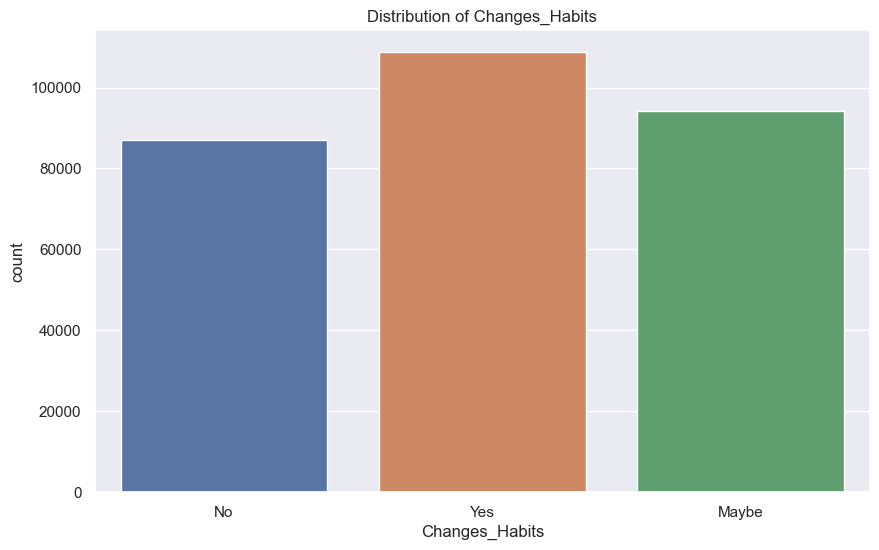

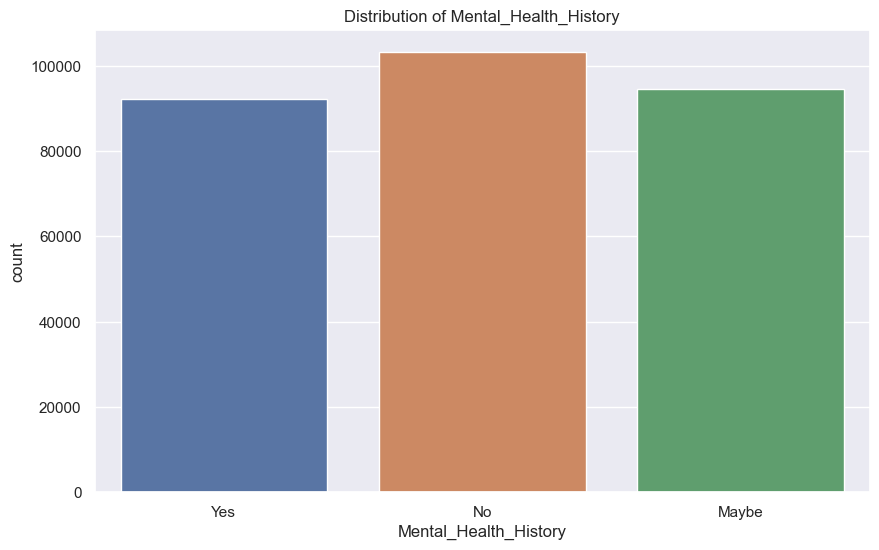

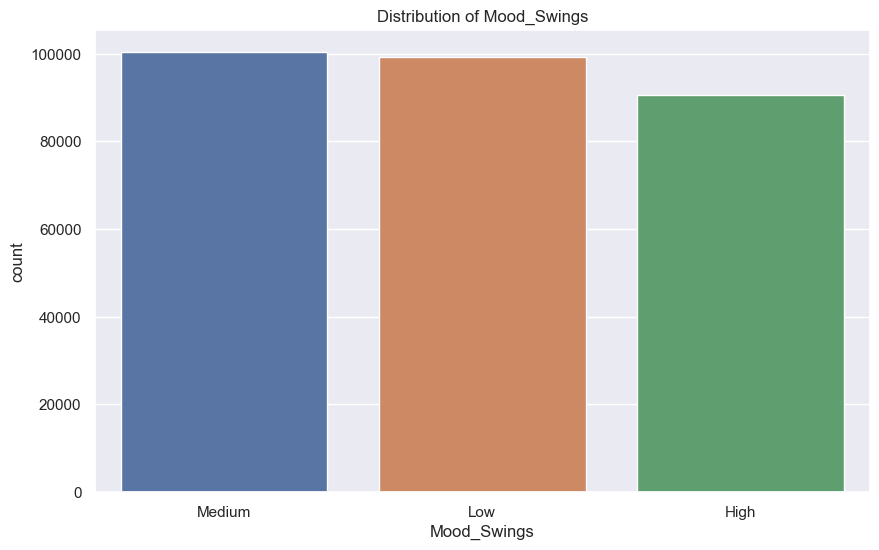

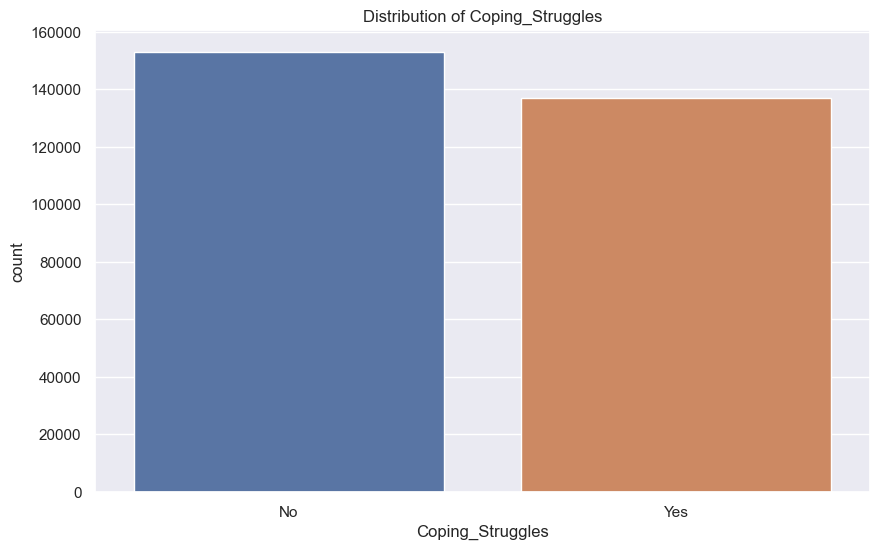

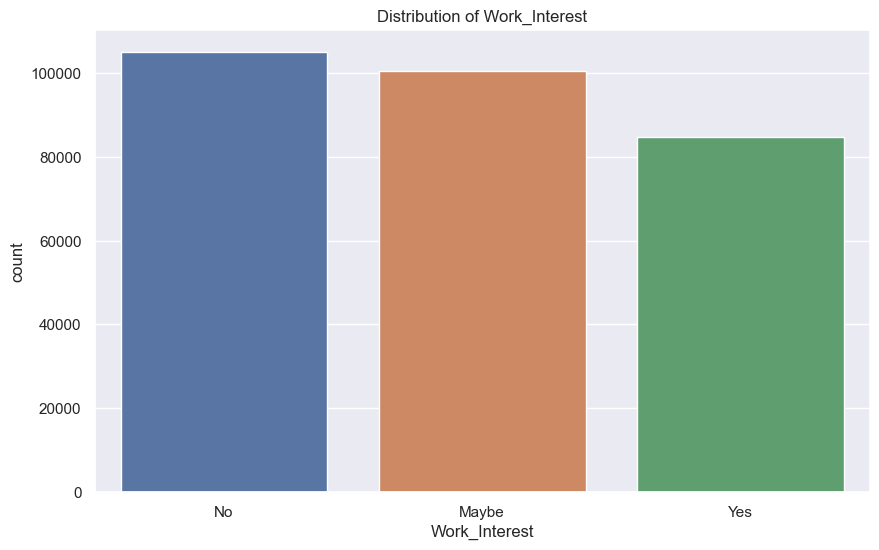

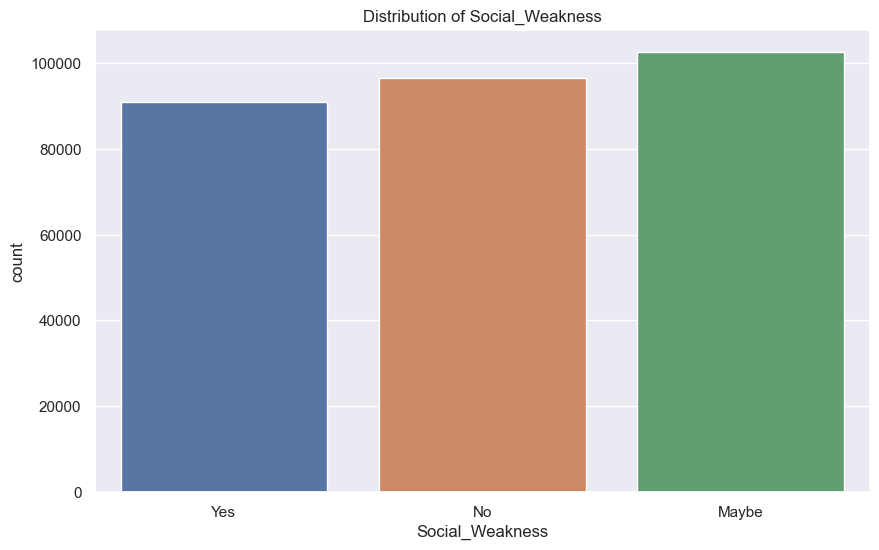

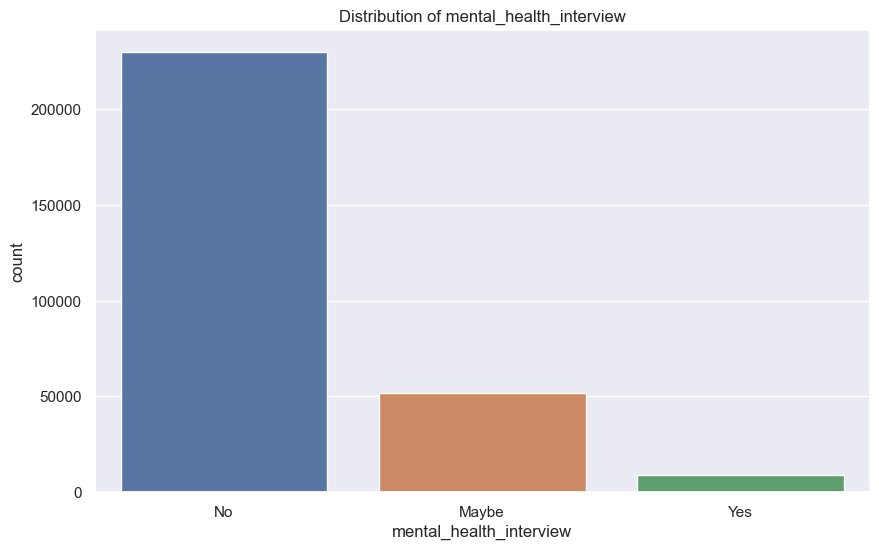

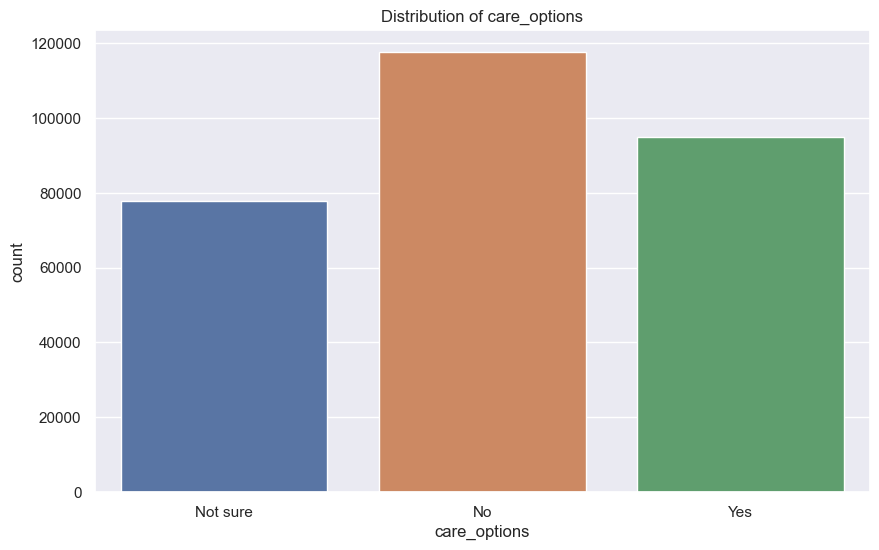

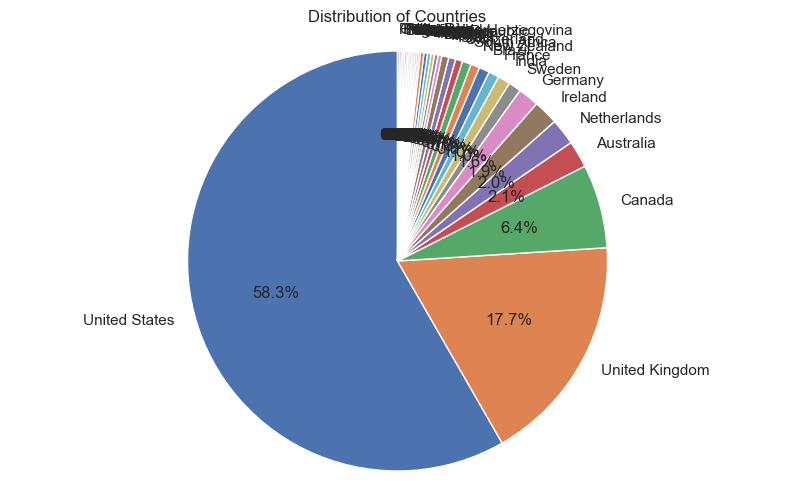

In [8]:
# Exclude 'Country' column and create bar plots for other categorical columns
for col in data.columns:
    if col != "Country" and data[col].dtype in ['object', 'int64']:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=data)
        plt.title(f'Distribution of {col}')
        plt.show()

# Create a pie chart for 'Country' column
plt.figure(figsize=(10, 6))
country_counts = data["Country"].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Countries")
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

In [9]:
# Calculate proportions of unique values in each categorical column
proportions = {col: data[col].value_counts(normalize=True) for col in data.columns if data[col].dtype == 'object'}
proportions

{'Gender': Gender
 Male      0.820201
 Female    0.179799
 Name: proportion, dtype: float64,
 'Country': Country
 United States             0.583042
 United Kingdom            0.177059
 Canada                    0.064468
 Australia                 0.020734
 Netherlands               0.020310
 Ireland                   0.019107
 Germany                   0.016135
 Sweden                    0.009695
 India                     0.009553
 France                    0.008068
 Brazil                    0.008068
 New Zealand               0.006864
 South Africa              0.006864
 Switzerland               0.005378
 Israel                    0.005378
 Italy                     0.005378
 Belgium                   0.002831
 Poland                    0.002831
 Russia                    0.002689
 Denmark                   0.002689
 Singapore                 0.002689
 Greece                    0.002689
 Czech Republic            0.001345
 Georgia                   0.001345
 Colombia              

> **Data Encoding**

In [10]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()

data["Gender"] = l_encoder.fit_transform(data["Gender"])
data["self_employed"] = l_encoder.fit_transform(data["self_employed"])
data["family_history"] = l_encoder.fit_transform(data["family_history"])
data["treatment"] = l_encoder.fit_transform(data["treatment"])
data["Coping_Struggles"] = l_encoder.fit_transform(data["Coping_Struggles"])

data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,United States,Corporate,0,0,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Not sure
1,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,No
2,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes
3,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,Maybe,Yes
4,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes


In [11]:
encoded_data = pd.get_dummies(data=data, columns=["Occupation", "Days_Indoors", "Growing_Stress",
            "Changes_Habits", "Mental_Health_History", "Work_Interest", "Social_Weakness",
            "mental_health_interview", "care_options"])

In [12]:
data.head()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,United States,Corporate,0,0,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Not sure
1,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,No
2,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes
3,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,Maybe,Yes
4,0,United States,Corporate,0,1,1,1-14 days,Yes,No,Yes,Medium,0,No,Yes,No,Yes


In [13]:
encoded_data = pd.get_dummies(data=encoded_data, columns=["Mood_Swings"])

In [14]:
encoded_data.head()

,Gender,Country,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,...,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium
0,0,United States,0,0,1,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,0,United States,0,1,1,0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
2,0,United States,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
3,0,United States,0,1,1,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True
4,0,United States,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True


In [15]:
from category_encoders import LeaveOneOutEncoder

leave_encoder = LeaveOneOutEncoder()
encoded_data["Country"] = leave_encoder.fit_transform(encoded_data["Country"], encoded_data.iloc[:, -3])

In [16]:
encoded_data.head()

,Gender,Country,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,...,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium
0,0,0.31273,0,0,1,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
2,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
3,0,0.31273,0,1,1,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True
4,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True


In [17]:
encoded_data.to_csv('../Results/Encoded Dataset.csv')

> **Splitting the Data**

In [18]:
from sklearn.model_selection import train_test_split

# y = encoded_data.iloc[:, -3:]
# X = encoded_data.drop(encoded_data.iloc[:, -3:], axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

# Define feature columns and target columns
feature_columns = encoded_data.columns.difference(["Mood_Swings_High", "Mood_Swings_Low", "Mood_Swings_Medium"])
target_columns = ["Mood_Swings_High", "Mood_Swings_Low", "Mood_Swings_Medium"]

# Split the dataset into 80% training and 20% testing, using stratification to maintain target distribution
X_train, X_test, y_train, y_test = train_test_split(
    encoded_data[feature_columns], 
    encoded_data[target_columns], 
    test_size=0.2, 
    random_state=42, 
    stratify=encoded_data[target_columns]
)

# Display the shapes of the training and testing subsets to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # Output the shapes of the subsets

((232040, 37), (58011, 37), (232040, 3), (58011, 3))

> **Linear SVC Model**

In [19]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Initialize MultiOutputClassifier with LinearSVC as the base estimator
multioutput_linear_reg = MultiOutputClassifier(LinearSVC(random_state=42, max_iter=10000))

# Train the model with the training data
multioutput_linear_reg.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_linear_reg = multioutput_linear_reg.predict(X_test)

# Calculate accuracy for each output variable
accuracy_high_linear_reg = accuracy_score(y_test["Mood_Swings_High"], y_pred_linear_reg[:, 0])
accuracy_low_linear_reg = accuracy_score(y_test["Mood_Swings_Low"], y_pred_linear_reg[:, 1])
accuracy_medium_linear_reg = accuracy_score(y_test["Mood_Swings_Medium"], y_pred_linear_reg[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_linear_reg = (accuracy_high_linear_reg + accuracy_low_linear_reg + accuracy_medium_linear_reg) / 3

# Calculate accuracy for each output variable
roc_auc_high_linear_reg = roc_auc_score(y_test["Mood_Swings_High"], y_pred_linear_reg[:, 0])
roc_auc_low_linear_reg = roc_auc_score(y_test["Mood_Swings_Low"], y_pred_linear_reg[:, 1])
roc_auc_medium_linear_reg = roc_auc_score(y_test["Mood_Swings_Medium"], y_pred_linear_reg[:, 2])

# Overall accuracy as an average of all three outputs
overall_roc_auc_linear_reg = (roc_auc_high_linear_reg + roc_auc_low_linear_reg + roc_auc_medium_linear_reg) / 3

# Return the accuracy results and the first few predictions
overall_accuracy_linear_reg, overall_roc_auc_linear_reg  

(0.6769750564548104, 0.5330473873253786)

In [20]:
y_pred_linear_reg[:10], y_test[:10]

(array([[False, False, False],
        [False, False,  True],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False,  True],
        [False, False, False]]),
         Mood_Swings_High  Mood_Swings_Low  Mood_Swings_Medium
 189923             False             True               False
 280089             False            False                True
 218079             False             True               False
 184930              True            False               False
 126229             False            False                True
 168935             False             True               False
 191356             False             True               False
 72395              False            False                True
 29705               True            False               False
 139212             False            False                

> **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize MultiOutputClassifier with Logistic Regression as the base estimator
multioutput_log_reg = MultiOutputClassifier(LogisticRegression(random_state=42, max_iter=10000))

# Train the model with the training data
multioutput_log_reg.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_log_reg = multioutput_log_reg.predict(X_test)

# Calculate accuracy for each output variable
accuracy_high_log_reg = accuracy_score(y_test["Mood_Swings_High"], y_pred_log_reg[:, 0])
accuracy_low_log_reg = accuracy_score(y_test["Mood_Swings_Low"], y_pred_log_reg[:, 1])
accuracy_medium_log_reg = accuracy_score(y_test["Mood_Swings_Medium"], y_pred_log_reg[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_log_reg = (accuracy_high_log_reg + accuracy_low_log_reg + accuracy_medium_log_reg) / 3

# Calculate ROC AUC for each output variable
roc_auc_high_log_reg = roc_auc_score(y_test["Mood_Swings_High"], y_pred_log_reg[:, 0])
roc_auc_low_log_reg = roc_auc_score(y_test["Mood_Swings_Low"], y_pred_log_reg[:, 1])
roc_auc_medium_log_reg = roc_auc_score(y_test["Mood_Swings_Medium"], y_pred_log_reg[:, 2])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_log_reg = (roc_auc_high_log_reg + roc_auc_low_log_reg + roc_auc_medium_log_reg) / 3

# Return the accuracy results and the first few predictions
overall_accuracy_log_reg, overall_roc_auc_log_reg

(0.6777507714054232, 0.5382077163738933)

In [22]:
y_pred_log_reg[:10], y_test[:10]

(array([[False, False, False],
        [False, False,  True],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False,  True],
        [False, False, False],
        [False, False,  True],
        [False, False, False]]),
         Mood_Swings_High  Mood_Swings_Low  Mood_Swings_Medium
 189923             False             True               False
 280089             False            False                True
 218079             False             True               False
 184930              True            False               False
 126229             False            False                True
 168935             False             True               False
 191356             False             True               False
 72395              False            False                True
 29705               True            False               False
 139212             False            False                

> **Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB

# Initialize MultiOutputClassifier with Naive Bayes (GaussianNB) as the base estimator
multioutput_nb = MultiOutputClassifier(GaussianNB())

# Train the model with the training data
multioutput_nb.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_nb = multioutput_nb.predict(X_test)

# Calculate accuracy for each output variable
accuracy_high_nb = accuracy_score(y_test["Mood_Swings_High"], y_pred_nb[:, 0])
accuracy_low_nb = accuracy_score(y_test["Mood_Swings_Low"], y_pred_nb[:, 1])
accuracy_medium_nb = accuracy_score(y_test["Mood_Swings_Medium"], y_pred_nb[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_nb = (accuracy_high_nb + accuracy_low_nb + accuracy_medium_nb) / 3

# Calculate ROC AUC for each output variable
roc_auc_high_nb = roc_auc_score(y_test["Mood_Swings_High"], y_pred_nb[:, 0])
roc_auc_low_nb = roc_auc_score(y_test["Mood_Swings_Low"], y_pred_nb[:, 1])
roc_auc_medium_nb = roc_auc_score(y_test["Mood_Swings_Medium"], y_pred_nb[:, 2])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_nb = (roc_auc_high_nb + roc_auc_low_nb + roc_auc_medium_nb) / 3

# Return the accuracy results and the first few predictions
overall_accuracy_nb, overall_roc_auc_nb

(0.6470382053978269, 0.5678421398175062)

In [24]:
y_pred_nb[:10], y_test[:10]

(array([[False,  True,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False,  True],
        [False,  True, False],
        [False, False,  True],
        [False, False,  True]]),
         Mood_Swings_High  Mood_Swings_Low  Mood_Swings_Medium
 189923             False             True               False
 280089             False            False                True
 218079             False             True               False
 184930              True            False               False
 126229             False            False                True
 168935             False             True               False
 191356             False             True               False
 72395              False            False                True
 29705               True            False               False
 139212             False            False                

> **Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize MultiOutputClassifier with Random Forest as the base estimator
multioutput_rf = MultiOutputClassifier(RandomForestClassifier(random_state=42, n_estimators=100))

# Train the model with the training data
multioutput_rf.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_rf = multioutput_rf.predict(X_test)

# Calculate accuracy for each output variable
accuracy_high_rf = accuracy_score(y_test["Mood_Swings_High"], y_pred_rf[:, 0])
accuracy_low_rf = accuracy_score(y_test["Mood_Swings_Low"], y_pred_rf[:, 1])
accuracy_medium_rf = accuracy_score(y_test["Mood_Swings_Medium"], y_pred_rf[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_rf = (accuracy_high_rf + accuracy_low_rf + accuracy_medium_rf) / 3

# Calculate ROC AUC for each output variable
roc_auc_high_rf = roc_auc_score(y_test["Mood_Swings_High"], y_pred_rf[:, 0])
roc_auc_low_rf = roc_auc_score(y_test["Mood_Swings_Low"], y_pred_rf[:, 1])
roc_auc_medium_rf = roc_auc_score(y_test["Mood_Swings_Medium"], y_pred_rf[:, 2])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_rf = (roc_auc_high_rf + roc_auc_low_rf + roc_auc_medium_rf) / 3

# Return the accuracy results and overall ROC AUC
overall_accuracy_rf, overall_roc_auc_rf

(0.9935874230749341, 0.9928522652076318)

In [26]:
y_pred_rf[:10], y_test[:10]

(array([[False,  True, False],
        [False, False,  True],
        [False,  True, False],
        [ True, False, False],
        [False, False,  True],
        [False,  True, False],
        [False,  True, False],
        [False, False,  True],
        [ True, False, False],
        [False, False,  True]]),
         Mood_Swings_High  Mood_Swings_Low  Mood_Swings_Medium
 189923             False             True               False
 280089             False            False                True
 218079             False             True               False
 184930              True            False               False
 126229             False            False                True
 168935             False             True               False
 191356             False             True               False
 72395              False            False                True
 29705               True            False               False
 139212             False            False                

> **XGBoost**

In [27]:
from xgboost import XGBClassifier

# Initialize MultiOutputClassifier with XGBoost as the base estimator
multioutput_xgb = MultiOutputClassifier(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))

# Train the model with the training data
multioutput_xgb.fit(X_train, y_train)

# Perform predictions on the test set
y_pred_xgb = multioutput_xgb.predict(X_test)

# Calculate accuracy for each output variable
accuracy_high_xgb = accuracy_score(y_test["Mood_Swings_High"], y_pred_xgb[:, 0])
accuracy_low_xgb = accuracy_score(y_test["Mood_Swings_Low"], y_pred_xgb[:, 1])
accuracy_medium_xgb = accuracy_score(y_test["Mood_Swings_Medium"], y_pred_xgb[:, 2])

# Overall accuracy as an average of all three outputs
overall_accuracy_xgb = (accuracy_high_xgb + accuracy_low_xgb + accuracy_medium_xgb) / 3

# Calculate ROC AUC for each output variable
roc_auc_high_xgb = roc_auc_score(y_test["Mood_Swings_High"], y_pred_xgb[:, 0])
roc_auc_low_xgb = roc_auc_score(y_test["Mood_Swings_Low"], y_pred_xgb[:, 1])
roc_auc_medium_xgb = roc_auc_score(y_test["Mood_Swings_Medium"], y_pred_xgb[:, 2])

# Overall ROC AUC as an average of all three outputs
overall_roc_auc_xgb = (roc_auc_high_xgb + roc_auc_low_xgb + roc_auc_medium_xgb) / 3

# Return the accuracy results and the first few predictions
overall_accuracy_xgb, overall_roc_auc_xgb

(0.996288060310401, 0.9957097656516068)

In [28]:
y_pred_xgb[:10], y_test[:10]

(array([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1]]),
         Mood_Swings_High  Mood_Swings_Low  Mood_Swings_Medium
 189923             False             True               False
 280089             False            False                True
 218079             False             True               False
 184930              True            False               False
 126229             False            False                True
 168935             False             True               False
 191356             False             True               False
 72395              False            False                True
 29705               True            False               False
 139212             False            False                True)

> **Model Comparison**

In [29]:
# Example data for demonstration purposes
accuracy_roc_values = {
    "Model": ["LinearSVC", "Logistic Regression", "Naive Bayes", "Random Forest", "XGBoost"],
    "Accuracy": [overall_accuracy_linear_reg, overall_accuracy_log_reg, overall_accuracy_nb, overall_accuracy_rf, overall_accuracy_xgb],  # Overall accuracy as the average,
    "ROC AUC": [overall_roc_auc_linear_reg, overall_roc_auc_log_reg, overall_roc_auc_nb, overall_roc_auc_rf, overall_roc_auc_xgb] # Overall ROC AUC as the average
}

# Create dataframes from the dictionaries
combined_data = pd.DataFrame(accuracy_roc_values)

combined_data

,Model,Accuracy,ROC AUC
0,LinearSVC,0.676975,0.533047
1,Logistic Regression,0.677751,0.538208
2,Naive Bayes,0.647038,0.567842
3,Random Forest,0.993587,0.992852
4,XGBoost,0.996288,0.995710


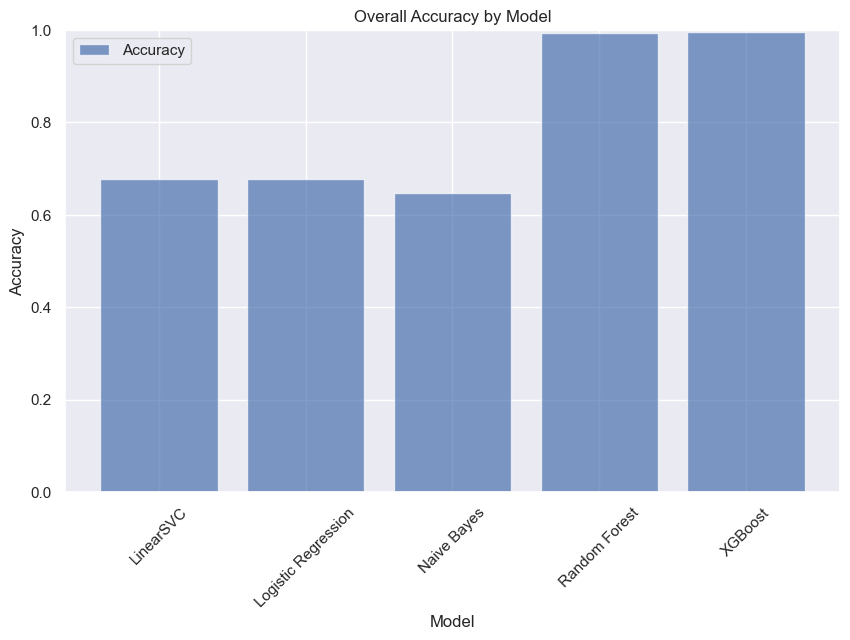

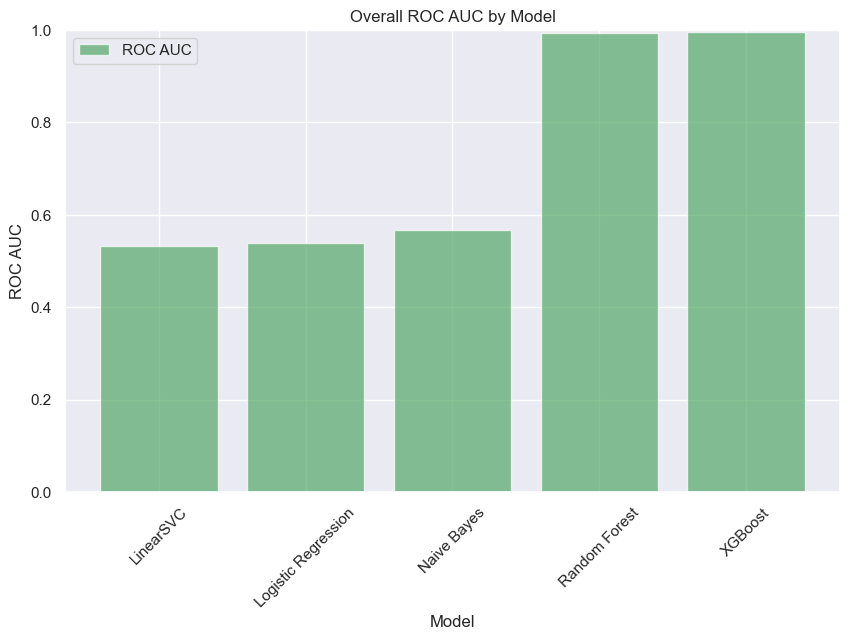

In [30]:
# Creating a bar plot for accuracy
plt.figure(figsize=(10, 6))
plt.bar(combined_data["Model"], combined_data["Accuracy"], color='b', alpha=0.7, label="Accuracy")
plt.title("Overall Accuracy by Model")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Creating a bar plot for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(combined_data["Model"], combined_data["ROC AUC"], color='g', alpha=0.7, label="ROC AUC")
plt.title("Overall ROC AUC by Model")
plt.xlabel("Model")
plt.ylabel("ROC AUC")
plt.ylim(0, 1)  # ROC AUC is also between 0 and 1
plt.xticks(rotation=45)
plt.legend()
plt.show()  # Display the plots again

> **Selected Model - XGBoost**

In [31]:
y_test.to_csv("../Results/Mood Swings Test Data.csv")

y_pred_data = pd.DataFrame(y_pred_xgb, columns=["Mood_Swings_High", "Mood_Swings_Low", "Mood_Swings_Medium"])
y_pred_data = y_pred_data.applymap(lambda x: "TRUE" if x == 1 else "FALSE")

y_pred_data.to_csv("../Results/Mood Swings Predicted Data.csv")

In [32]:
from sklearn.metrics import hamming_loss, zero_one_loss, mean_squared_error

# Calculate Hamming Loss for the test set predictions
hamming_loss_xgb = hamming_loss(y_test, y_pred_xgb)

# Calculate Zero-One Loss (perfect prediction would be 0, one or more wrong predictions would be 1)
zero_one_loss_xgb = zero_one_loss(y_test, y_pred_xgb)

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Return the calculated error metrics
print("XGBoost Model:")
print("Hamming Loss - ", hamming_loss_xgb)
print("Zero One Loss - ", zero_one_loss_xgb)
print("Mean Squared Error - ", mse_xgb)

XGBoost Model:
Hamming Loss -  0.003711939689599099
Zero One Loss -  0.006895244005447276
Mean Squared Error -  0.0037119396895990988


> For Mood Swings - High

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report for "Mood_Swings_High"
class_report_high = classification_report(y_test["Mood_Swings_High"], y_pred_xgb[:, 0])
print("Classification Report - Mood Swings High (XGBoost):\n", class_report_high)

Classification Report - Mood Swings High (XGBoost):
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     39910
        True       1.00      1.00      1.00     18101

    accuracy                           1.00     58011
   macro avg       1.00      1.00      1.00     58011
weighted avg       1.00      1.00      1.00     58011



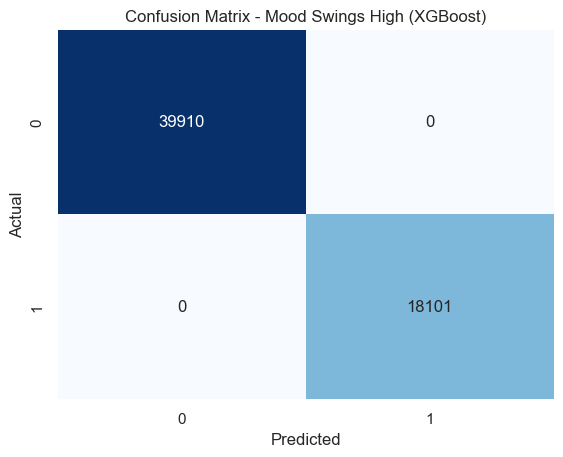

In [34]:
# Confusion matrix for "Mood_Swings_High"
conf_matrix_high = confusion_matrix(y_test["Mood_Swings_High"], y_pred_xgb[:, 0])
sns.heatmap(conf_matrix_high, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Mood Swings High (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

> For Mood Swings - Medium

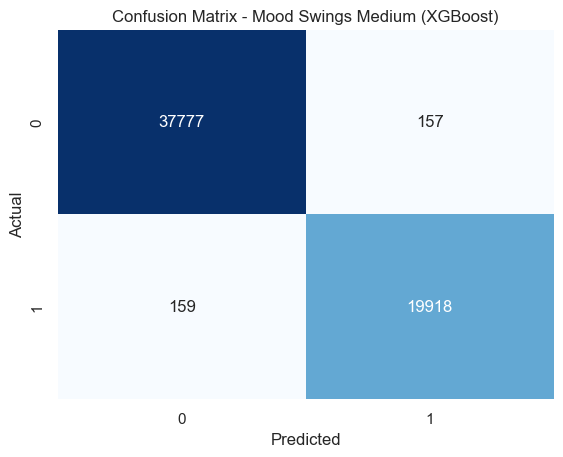

In [35]:
# Confusion matrix for "Mood_Swings_Medium"
conf_matrix_medium = confusion_matrix(y_test["Mood_Swings_Medium"], y_pred_xgb[:, 2])
sns.heatmap(conf_matrix_medium, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Mood Swings Medium (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [36]:
# Classification report for "Mood_Swings_Medium"
class_report_medium = classification_report(y_test["Mood_Swings_Medium"], y_pred_xgb[:, 2])
print("Classification Report - Mood Swings Medium (XGBoost):\n", class_report_medium)

Classification Report - Mood Swings Medium (XGBoost):
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     37934
        True       0.99      0.99      0.99     20077

    accuracy                           0.99     58011
   macro avg       0.99      0.99      0.99     58011
weighted avg       0.99      0.99      0.99     58011



> For Mood Swings - Low

In [37]:
# Classification report for "Mood_Swings_Low"
class_report_low = classification_report(y_test["Mood_Swings_Low"], y_pred_xgb[:, 1])
print("Classification Report - Mood Swings Low (XGBoost):\n", class_report_low)

Classification Report - Mood Swings Low (XGBoost):
               precision    recall  f1-score   support

       False       0.99      1.00      1.00     38178
        True       0.99      0.99      0.99     19833

    accuracy                           0.99     58011
   macro avg       0.99      0.99      0.99     58011
weighted avg       0.99      0.99      0.99     58011



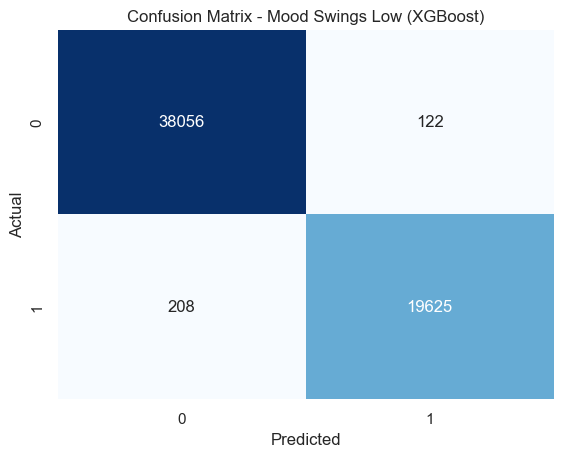

In [38]:
# Confusion matrix for "Mood_Swings_Low"
conf_matrix_low = confusion_matrix(y_test["Mood_Swings_Low"], y_pred_xgb[:, 1])
sns.heatmap(conf_matrix_low, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Mood Swings Low (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()